
#	Correcting Data Classification and creating a good database
#	AUTHOR: 乔昂 - jueta
#	DATE: 13/12/2022


In [39]:

import pandas as pd
import json
import matplotlib.pyplot as plt



file_path1 = "../../Data/experiments_05_12/"
sampling_frequency = 1e5
file_name = "exp9"

with open(file_path1 + file_name + ".json", 'r') as data_file:    
    data = json.loads(data_file.read())  

print("\data_window\n")
measurements_data_window = pd.json_normalize(data['measurements'])
processing_data_window = pd.json_normalize(data['processing'])
data_window = [measurements_data_window, processing_data_window]
data_window = pd.concat(data_window, axis=1)



\data_window



In [40]:
data_window.head()

,name,data [nA],flow rate [m3/s],voltage,current PS,temperature,humidity,date and time,target voltage,mean,variance,deviation,median,rms,spray mode.Sjaak,spray mode.Monica
0,setup/liquid/ethanol,"[5.786163806915283, 0.5031446218490601, 1.0062...",2.777800e-09,3001.36,-1.8675e-08,10,10,Mon_05 Dec 2022,3000,1.537967,12.263814,3.501973,1.509434,3.824808,intermittent 1,no streamer onset
1,setup/liquid/ethanol,"[-0.5031446218490601, -2.264150857925415, -0.5...",2.777800e-09,3001.36,-1.8675e-08,10,10,Mon_05 Dec 2022,3000,1.071653,11.051493,3.324378,1.006289,3.492841,dripping 1,no streamer onset
2,setup/liquid/ethanol,"[-0.5031446218490601, -0.5031446218490601, 6.5...",2.777800e-09,3001.36,-1.8675e-08,10,10,Mon_05 Dec 2022,3000,0.876840,10.441285,3.231298,0.754717,3.348154,dripping,no streamer onset
3,setup/liquid/ethanol,"[0.7547169923782349, 1.257861614227295, 5.5345...",2.777800e-09,3001.36,-1.8675e-08,10,10,Mon_05 Dec 2022,3000,1.290722,11.840508,3.441004,1.257862,3.675115,dripping 1,no streamer onset
4,setup/liquid/ethanol,"[-1.0062892436981201, 10.817609786987305, -9.3...",2.777800e-09,3001.36,-1.8675e-08,10,10,Mon_05 Dec 2022,3000,2.359371,1784.168945,42.239426,-0.503145,42.305264,dripping,no streamer onset


# correcting Classification

In [41]:

data_window['spray mode.Sjaak'] = data_window['spray mode.Sjaak'].replace(['intermittent 1', 'intermittent'], 'Intermittent')
data_window['spray mode.Sjaak'] = data_window['spray mode.Sjaak'].replace(['cone jet '], 'Cone Jet')
data_window['spray mode.Sjaak'] = data_window['spray mode.Sjaak'].replace(['dripping', 'dripping 1 '], 'Dripping')
data_window['spray mode.Sjaak'] = data_window['spray mode.Sjaak'].replace([''], 'Undefined')

# Creating Multi Jet Classification

In [42]:
data_window['spray mode.Sjaak'] = data_window['spray mode.Sjaak'].replace([''], 'Undefined')
data_window = data_window.dropna()

# Plotting

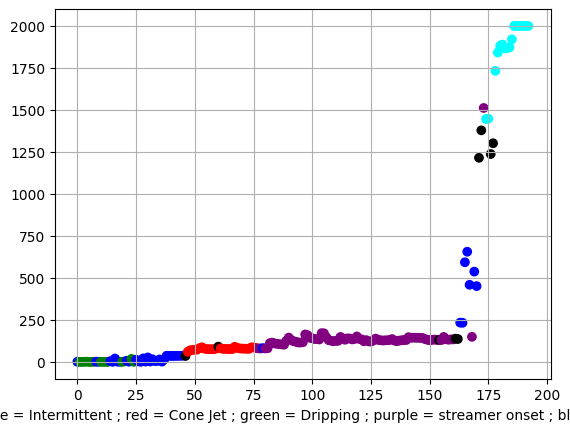

In [50]:

colors = {'Cone Jet':'red', 'Dripping':'green', 'Intermittent':'blue', 'Multi Jet':'purple', 'Undefined':'black', 'Corona':'cyan'}

plt.scatter( data_window.index, data_window['mean'],  c=data_window['spray mode.Sjaak'].map(colors))
# plt.ylim(top=250)
plt.grid()

plt.xlabel('Legend:  blue = Intermittent ; red = Cone Jet ; green = Dripping ; purple = streamer onset ; black = Undefined ')
plt.show()



# Correcting Data


In [32]:
data_window[77:175]

,name,data [nA],flow rate [m3/s],voltage,current PS,temperature,humidity,date and time,target voltage,mean,variance,deviation,median,rms,spray mode.Sjaak,spray mode.Monica
40,setup/liquid/ethanol,"[78.74214172363281, 73.710693359375, 75.220123...",2.777800e-09,5401.12,3.98847e-08,10,10,Mon_05 Dec 2022,5400,75.752357,12.264809,3.502115,75.723267,75.833260,Cone Jet,no streamer onset
41,setup/liquid/ethanol,"[86.03773498535156, 82.26414489746094, 82.2641...",2.777800e-09,5401.12,3.98847e-08,10,10,Mon_05 Dec 2022,5400,88.727913,14.705676,3.834798,88.805038,88.810730,Cone Jet,no streamer onset
42,setup/liquid/ethanol,"[89.05660247802734, 83.52201080322266, 86.5408...",2.777800e-09,5701.29,3.92738e-08,10,10,Mon_05 Dec 2022,5700,84.461182,13.797136,3.714450,84.528305,84.542816,Cone Jet,no streamer onset
43,setup/liquid/ethanol,"[79.49685668945312, 83.52201080322266, 78.7421...",2.777800e-09,5701.29,3.92738e-08,10,10,Mon_05 Dec 2022,5700,79.681061,13.334920,3.651701,79.748428,79.764694,Cone Jet,no streamer onset
44,setup/liquid/ethanol,"[80.0, 76.47798919677734, 77.73584747314453, 7...",2.777800e-09,5701.29,3.92738e-08,10,10,Mon_05 Dec 2022,5700,78.411209,12.540343,3.541235,78.490562,78.491127,Cone Jet,no streamer onset
45,setup/liquid/ethanol,"[82.26414489746094, 79.49685668945312, 78.7421...",2.777800e-09,5701.29,3.92738e-08,10,10,Mon_05 Dec 2022,5700,77.905663,14.774551,3.843768,77.735847,78.000435,Cone Jet,no streamer onset
46,setup/liquid/ethanol,"[88.0503158569336, 92.32704162597656, 87.79874...",2.777800e-09,6001.26,3.98847e-08,10,10,Mon_05 Dec 2022,6000,87.252701,16.248011,4.030882,87.295601,87.345764,Cone Jet,no streamer onset
47,setup/liquid/ethanol,"[84.27672576904297, 86.289306640625, 77.987426...",2.777800e-09,6001.26,3.98847e-08,10,10,Mon_05 Dec 2022,6000,82.367348,1793.555176,42.350388,79.748428,92.617142,Intermittent,no streamer onset
48,setup/liquid/ethanol,"[75.4717025756836, 76.98113250732422, 82.01258...",2.777800e-09,6001.26,3.98847e-08,10,10,Mon_05 Dec 2022,6000,78.405724,13.554052,3.681583,78.490562,78.492111,Cone Jet,no streamer onset
49,setup/liquid/ethanol,"[80.50314331054688, 76.98113250732422, 77.2327...",2.777800e-09,6001.26,3.98847e-08,10,10,Mon_05 Dec 2022,6000,77.882324,12.400205,3.521392,77.987427,77.961891,Cone Jet,no streamer onset


In [49]:
data_window[174:] = data_window[174:].replace(['Multi Jet'], 'Corona')

# Data to be Exported

In [ ]:
data_window = data_window.drop(['spray mode.Monica'], axis=1)
data_window = data_window.rename(columns={"spray mode.Sjaak": "classification"})
data_window = data_window.rename(columns={"data [nA]": "sample"})
data_window = data_window.rename(columns={"flow rate [m3/s]": "flow_rate"})
data_window.head()

In [51]:
file_exported_name = "exp9_corrected"
data_window.to_feather(file_exported_name + '.feather')